 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_returns_csv, index_col='Date',
                         parse_dates=True, infer_datetime_format=True)

In [4]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns_csv, index_col='Date',
                         parse_dates=True, infer_datetime_format=True)

In [7]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_history_csv, index_col='Date',
                         parse_dates=True, infer_datetime_format=True)

In [10]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close'] = sp500_df['Close'].astype(float)
sp500_df.dtypes

Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
sp500_df.sort_values(by=['Date'], ascending=True, inplace=True)
sp500_df = sp500_df.pct_change()
sp500_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [13]:
# Drop nulls
sp500_df.dropna(inplace=True)
sp500_df.isnull().sum()

Close    0
dtype: int64

In [14]:
# Rename Column
sp500_df.rename(columns={'Close': 'Daily Returns'}, inplace=True)
sp500_df.head()

,Daily Returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat([whale_df, algo_df, sp500_df], axis='columns', join='inner')
combined_df.rename(columns={'Daily Returns': 'S&P 500'}, inplace=True)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

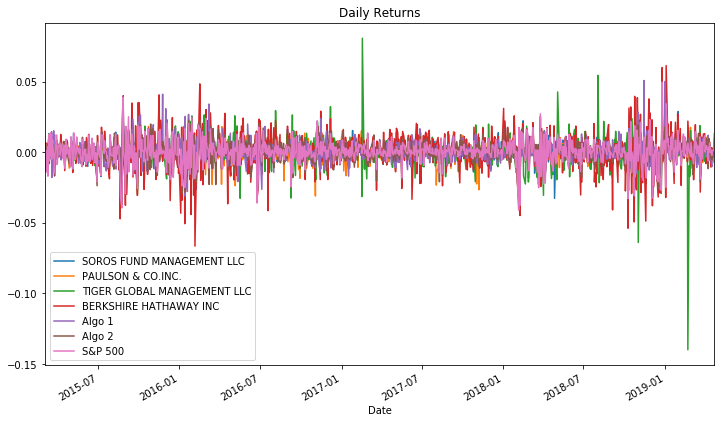

In [16]:
# Plot daily returns
combined_df.plot(figsize=(12,7), title='Daily Returns')

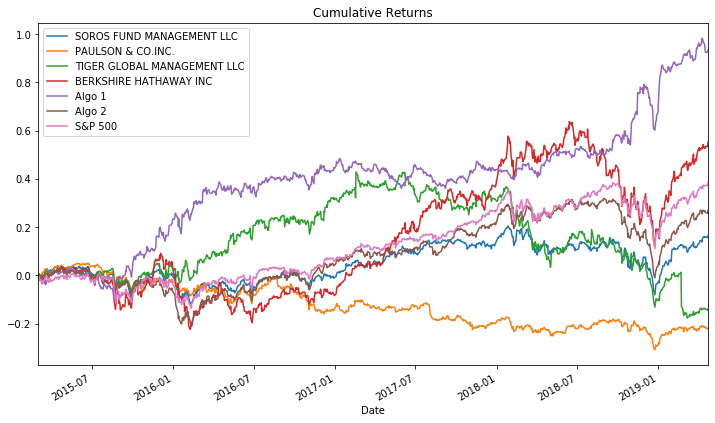

In [86]:
# Plot cumulative returns
cumulative_returns = (1 + combined_df).cumprod() - 1
cumulative_returns.plot(figsize=(12,7), title='Cumulative Returns')

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

Text(0.5, 1.0, 'Portfolio Returns')

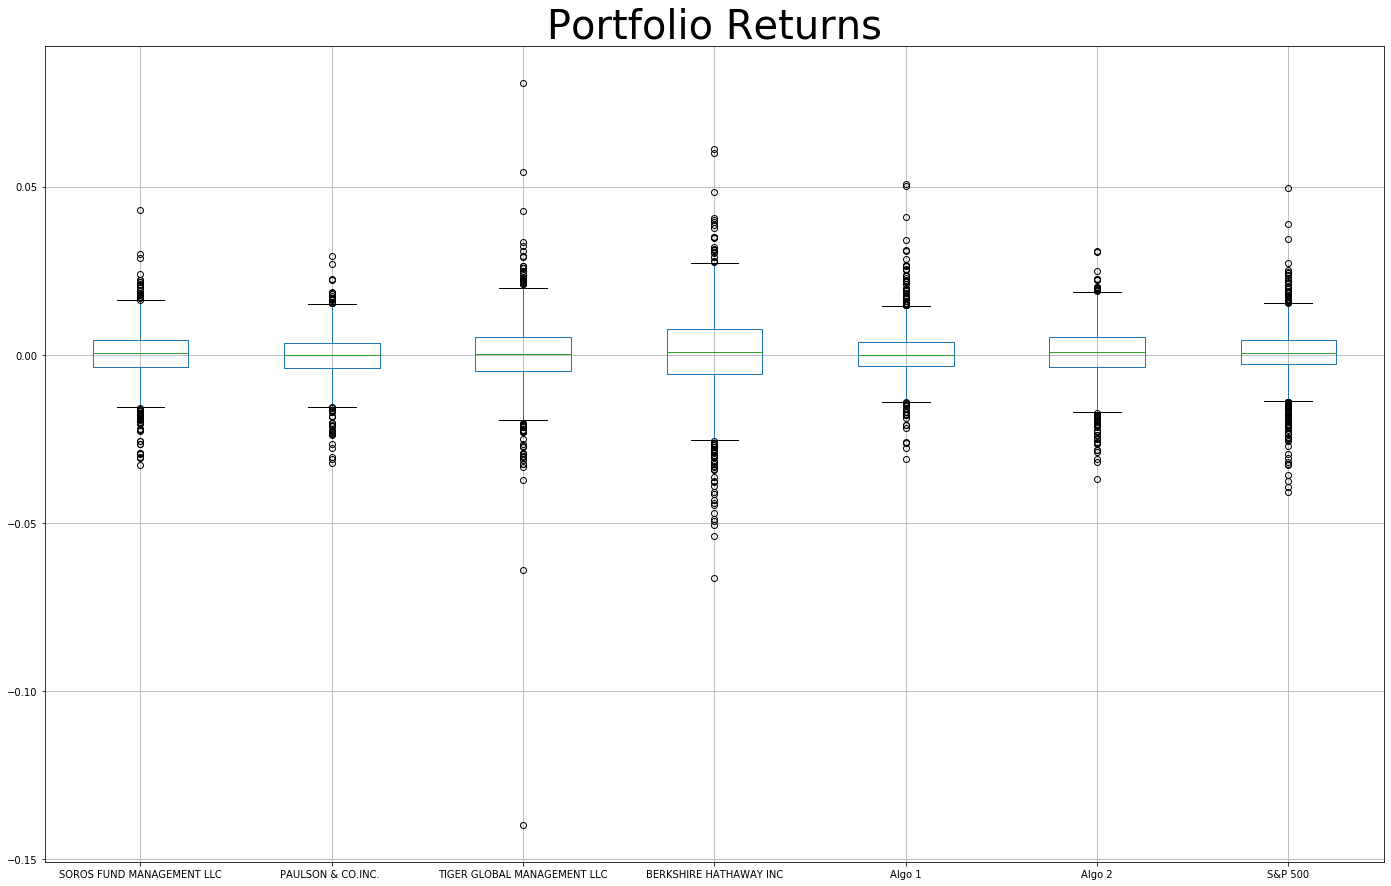

In [87]:
# Box plot to visually show risk
combined_df.boxplot(figsize=(24,15)).set_title('Portfolio Returns', fontsize=40)

In [19]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
combined_df_std = combined_df.std()
combined_df_std.sort_values(ascending=False, inplace=True)
combined_df_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_df.std() * np.sqrt(252)
annualized_std.sort_values(ascending=False, inplace=True)
annualized_std

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P 500                        0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

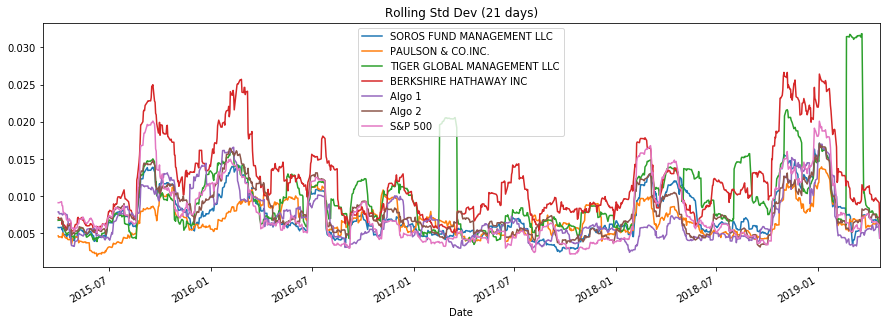

In [84]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
combined_std_plot = combined_df.rolling(window=21).std().plot(figsize=(15,5), title="Rolling Std Dev (21 days)")


In [22]:
# Correlation
correlation = combined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


Text(0.5, 1, 'Correlation')

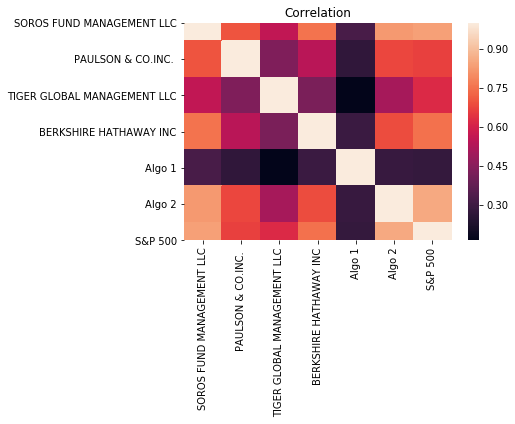

In [23]:
sns.heatmap(correlation).set_title("Correlation")

In [52]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
BH_covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df['S&P 500'])
variance = combined_df['S&P 500'].rolling(window=60).var()
BH_rolling_beta = BH_covariance / variance
BH_rolling_beta.dropna(inplace=True)
BH_rolling_beta

Date
2015-05-27    0.652798
2015-05-28    0.650503
2015-05-29    0.663826
2015-06-01    0.662655
2015-06-02    0.642690
                ...   
2019-04-16    1.337986
2019-04-17    1.301791
2019-04-18    1.302226
2019-04-22    1.304125
2019-04-23    1.278284
Length: 984, dtype: float64

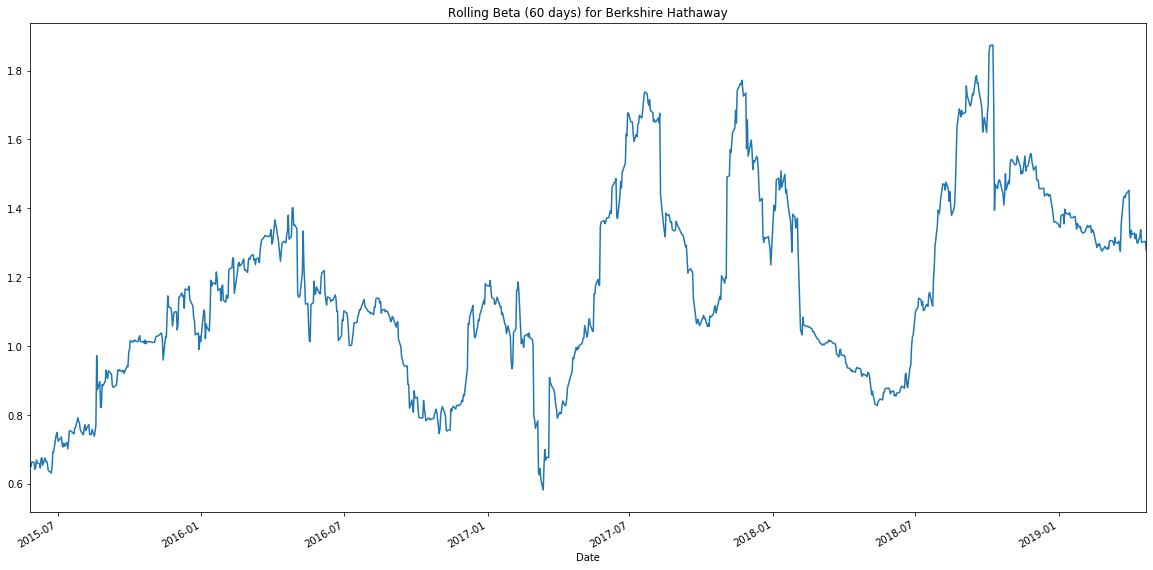

In [53]:
BH_rolling_beta.plot(figsize=(20,10), title="Rolling Beta (60 days) for Berkshire Hathaway")

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [54]:
exp_wt_avg = combined_df.ewm(halflife=21, ignore_na=True, axis='columns').mean()
exp_wt_avg.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.003154,-0.002238,-0.003375,-0.003069,-0.002686,-0.002978
2015-03-04,0.002230,0.002744,0.000926,0.001789,-0.000426,0.000088,-0.000617
2015-03-05,0.004016,0.004047,0.003464,0.004320,0.003194,0.003398,0.003052
2015-03-06,-0.007905,-0.005704,-0.006660,-0.008350,-0.007626,-0.008319,-0.009240
2015-03-09,0.000582,0.002434,0.003608,0.002227,0.000589,0.000718,0.001226


---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [55]:
# Annualzied Sharpe Ratios
sharpe_ratios = (combined_df.mean()*252) / (combined_df.std()*np.sqrt(252))
sharpe_ratios.sort_values(ascending=False, inplace=True)
sharpe_ratios

Algo 1                         1.378648
S&P 500                        0.648267
BERKSHIRE HATHAWAY INC         0.621810
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

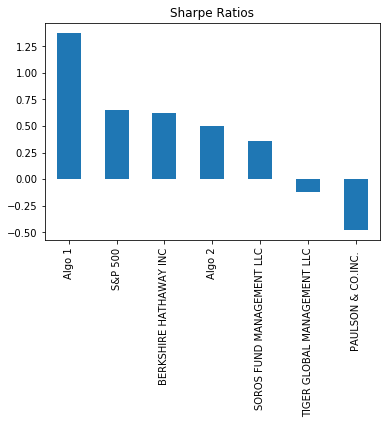

In [56]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [57]:
# Read the first stock
orcl_csv = Path('Resources/orcl_historical.csv')
orcl_df = pd.read_csv(orcl_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
orcl_df.rename(columns={'Close': 'Oracle'}, inplace=True)
orcl_df = orcl_df.pct_change().dropna()
orcl_df.head()

,Oracle
Date,
2018-01-17,0.013712
2018-01-18,-0.000796
2018-01-19,0.006968
2018-01-22,0.002570
2018-01-23,0.008085


In [58]:
# Read the second stock
sbux_csv = Path('Resources/sbux_historical.csv')
sbux_df = pd.read_csv(sbux_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
sbux_df.rename(columns={'Close': 'Starbucks'}, inplace=True)
sbux_df = sbux_df.pct_change().dropna()
sbux_df.head()

,Starbucks
Date,
2018-01-17,0.001651
2018-01-18,0.007089
2018-01-19,0.002783
2018-01-22,0.002449
2018-01-23,0.004560


In [59]:
# Read the third stock
ge_csv = Path('Resources/ge_historical.csv')
ge_df = pd.read_csv(ge_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
ge_df.rename(columns={'Close': 'GE'}, inplace=True)
ge_df = ge_df.pct_change().dropna()
ge_df.head()

,GE
Date,
2018-01-17,-0.047227
2018-01-18,-0.033429
2018-01-19,-0.030411
2018-01-22,-0.005535
2018-01-23,0.044527


In [60]:
# Concatenate all stocks into a single DataFrame
custom_portfolio = pd.concat([orcl_df, sbux_df, ge_df], axis='columns', join='inner')
custom_portfolio.head()

,Oracle,Starbucks,GE
Date,,,
2018-01-17,0.013712,0.001651,-0.047227
2018-01-18,-0.000796,0.007089,-0.033429
2018-01-19,0.006968,0.002783,-0.030411
2018-01-22,0.002570,0.002449,-0.005535
2018-01-23,0.008085,0.004560,0.044527


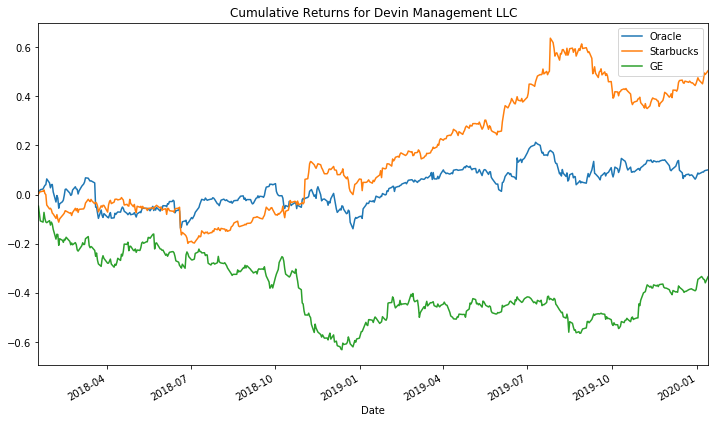

In [61]:
cumulative_returns_3 = (1 + custom_portfolio).cumprod() - 1
cumulative_returns_3.plot(figsize=(12,7), title="Cumulative Returns for Devin Management LLC")

In [62]:
# Reset the index
custom_portfolio.reset_index(drop=True)
# Change to another column

,Oracle,Starbucks,GE
0,0.013712,0.001651,-0.047227
1,-0.000796,0.007089,-0.033429
2,0.006968,0.002783,-0.030411
3,0.002570,0.002449,-0.005535
4,0.008085,0.004560,0.044527
...,...,...,...
496,0.002221,-0.003064,-0.007414
497,-0.000554,0.011609,-0.009129
498,0.004619,0.018564,-0.002513
499,0.001287,-0.004087,-0.020151


In [63]:
# Drop Nulls
custom_portfolio.isnull().sum()

Oracle       0
Starbucks    0
GE           0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [64]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]

portfolio_returns = (custom_portfolio['Oracle']*weights[0]) + (custom_portfolio['Starbucks']*weights[1]) + (custom_portfolio['GE']*weights[2])
portfolio_returns

Date
2018-01-17   -0.010621
2018-01-18   -0.009045
2018-01-19   -0.006887
2018-01-22   -0.000172
2018-01-23    0.019057
                ...   
2020-01-07   -0.002752
2020-01-08    0.000642
2020-01-09    0.006890
2020-01-10   -0.007650
2020-01-13    0.017051
Length: 501, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [65]:
all_returns = pd.concat([portfolio_returns, combined_df], axis='columns', join='inner')
all_returns.rename(columns={0: 'DEVIN MANAGEMENT LLC'}, inplace=True)
all_returns.head()
all_returns

,DEVIN MANAGEMENT LLC,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,
2018-01-17,-0.010621,0.008249,-0.002485,0.013650,0.008472,-0.000312,0.007632,0.009415
2018-01-18,-0.009045,0.002361,-0.000724,-0.007388,-0.000717,0.000776,-0.003683,-0.001616
2018-01-19,-0.006887,0.004771,0.001870,0.005331,0.003258,-0.001067,0.007944,0.004385
2018-01-22,-0.000172,0.007716,0.009471,0.007179,0.003236,0.000157,0.007071,0.008067
2018-01-23,0.019057,0.000211,0.000202,0.001084,0.008253,0.002182,0.002544,0.002174
...,...,...,...,...,...,...,...,...
2019-04-16,0.003682,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.003955,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.012822,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


In [89]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns.isnull().sum()

DEVIN MANAGEMENT LLC           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
dtype: int64

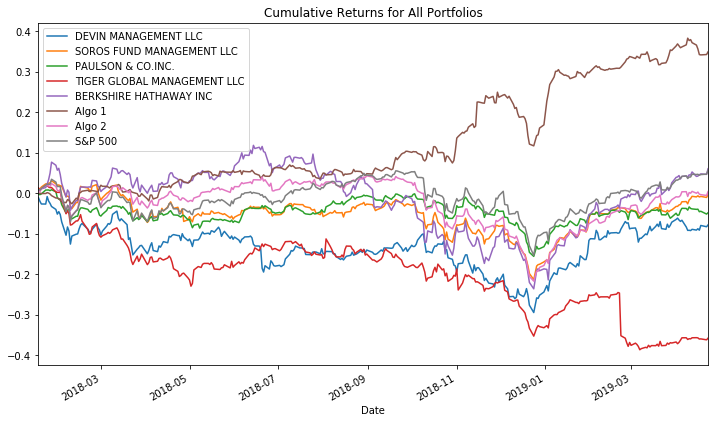

In [92]:
cumulative_returns_4 = (1 + all_returns).cumprod() - 1
cumulative_returns_4.plot(figsize=(12,7), title="Cumulative Returns for All Portfolios")


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

Text(0.5, 1.0, 'Portfolio Returns')

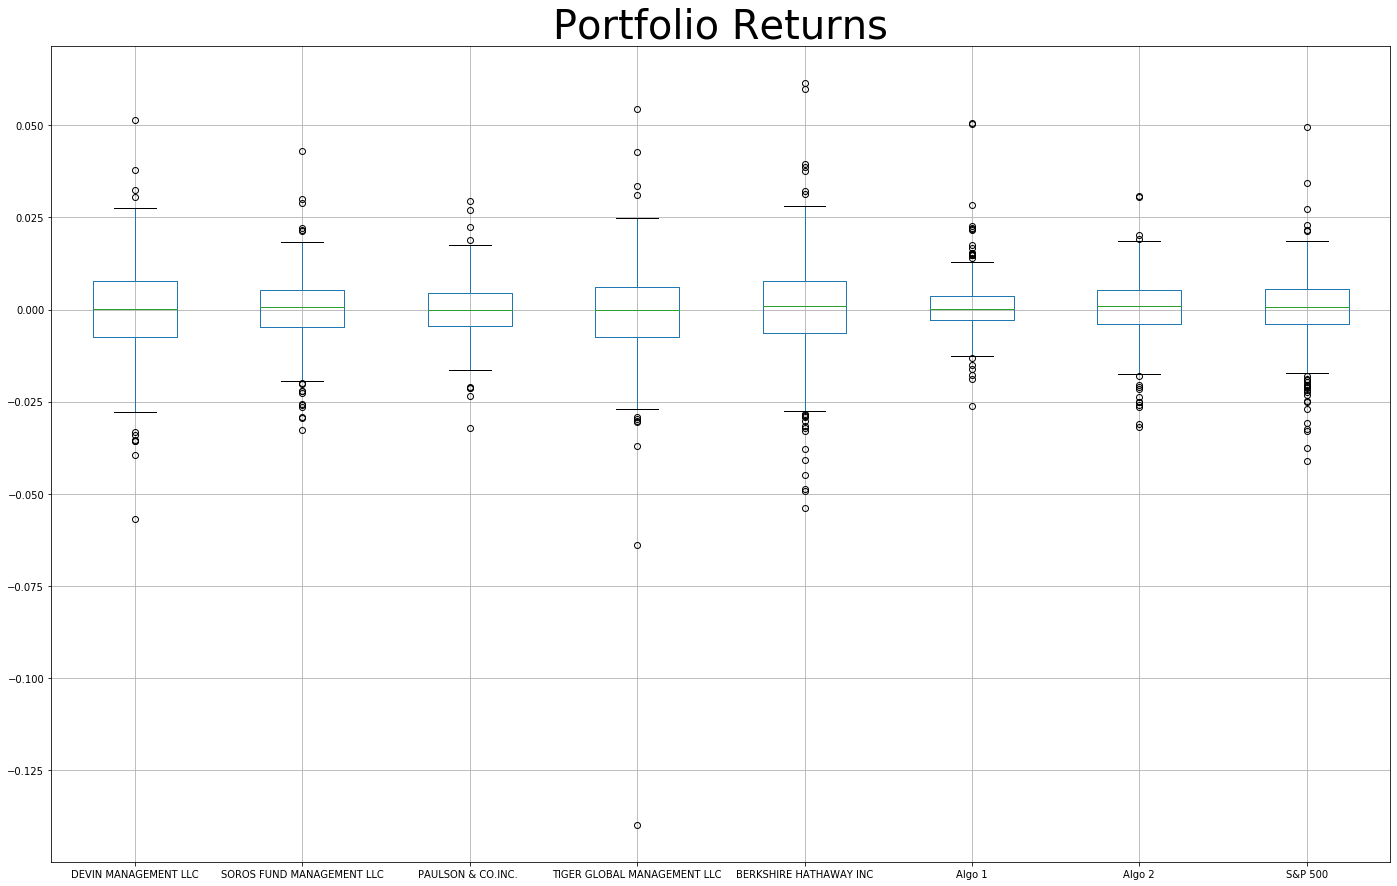

In [88]:
# Risk
all_returns.boxplot(figsize=(24,15)).set_title('Portfolio Returns', fontsize=40)

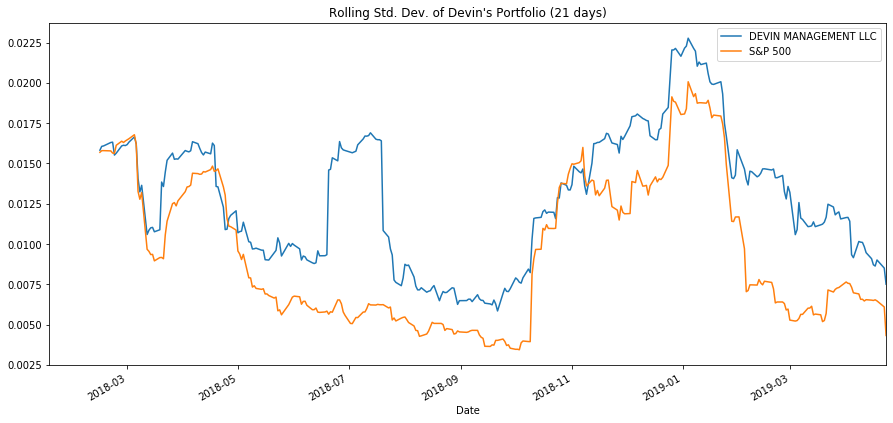

In [68]:
# Rolling
sp500_and_portfolio = all_returns.drop(all_returns.columns[1:7], axis='columns')
portfolio_rolling = sp500_and_portfolio.rolling(window=21).std().plot(figsize=(15,7), title="Rolling Std. Dev. of Devin's Portfolio (21 days)")

In [69]:
# Beta
portfolio_covariance = all_returns['DEVIN MANAGEMENT LLC'].rolling(window=60).cov(all_returns['S&P 500'])
portfolio_variance = all_returns['S&P 500'].rolling(window=60).var()
portfolio_rolling_beta = portfolio_covariance / portfolio_variance
portfolio_rolling_beta.dropna(inplace=True)
portfolio_rolling_beta

Date
2018-04-12    0.848413
2018-04-13    0.862240
2018-04-16    0.854370
2018-04-17    0.869206
2018-04-18    0.874071
                ...   
2019-04-16    1.121904
2019-04-17    1.141927
2019-04-18    1.139715
2019-04-22    1.140036
2019-04-23    1.058055
Length: 259, dtype: float64

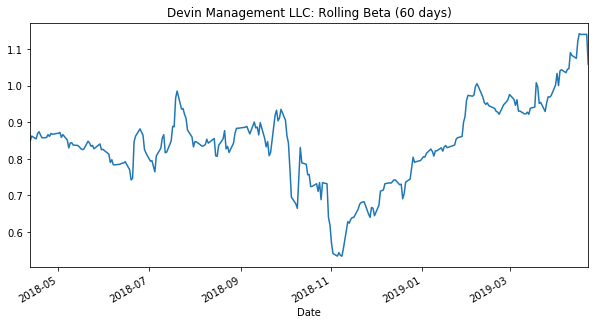

In [70]:
portfolio_rolling_beta.plot(figsize=(10,5), title="Devin Management LLC: Rolling Beta (60 days)")

In [71]:
# Annualzied Sharpe Ratios
all_sharpe_ratios = (all_returns.mean()*252) / (all_returns.std()*np.sqrt(252))
all_sharpe_ratios.sort_values(ascending=False, inplace=True)
all_sharpe_ratios

Algo 1                         1.990371
S&P 500                        0.349004
BERKSHIRE HATHAWAY INC         0.316029
Algo 2                         0.094710
SOROS FUND MANAGEMENT LLC      0.060038
DEVIN MANAGEMENT LLC          -0.201754
PAULSON & CO.INC.             -0.270741
TIGER GLOBAL MANAGEMENT LLC   -1.441675
dtype: float64

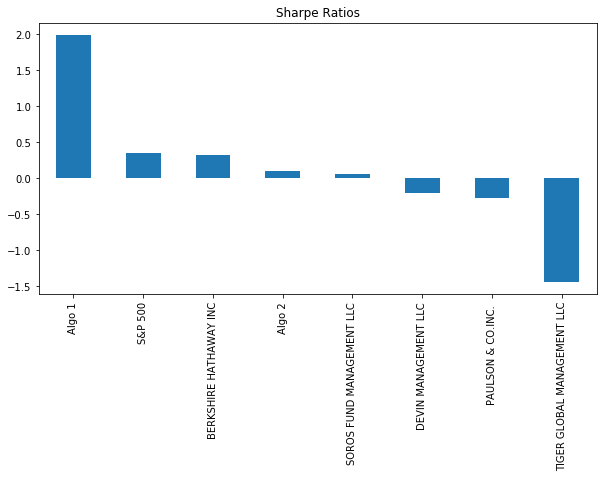

In [72]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratios.plot(figsize=(10,5), kind='bar', title='Sharpe Ratios')

## Include correlation analysis to determine which stocks (if any) are correlated

In [73]:
all_returns_corr = all_returns.corr()
all_returns_corr

,DEVIN MANAGEMENT LLC,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
DEVIN MANAGEMENT LLC,1.000000,0.583015,0.580958,0.360653,0.513742,0.185084,0.612914,0.658926
SOROS FUND MANAGEMENT LLC,0.583015,1.000000,0.777506,0.532331,0.794614,0.337578,0.841356,0.849893
PAULSON & CO.INC.,0.580958,0.777506,1.000000,0.543181,0.664242,0.351566,0.804846,0.791730
TIGER GLOBAL MANAGEMENT LLC,0.360653,0.532331,0.543181,1.000000,0.394368,0.145768,0.496441,0.568234
BERKSHIRE HATHAWAY INC,0.513742,0.794614,0.664242,0.394368,1.000000,0.327791,0.792899,0.844388
Algo 1,0.185084,0.337578,0.351566,0.145768,0.327791,1.000000,0.354497,0.286619
Algo 2,0.612914,0.841356,0.804846,0.496441,0.792899,0.354497,1.000000,0.889372
S&P 500,0.658926,0.849893,0.791730,0.568234,0.844388,0.286619,0.889372,1.000000


Text(0.5, 1, 'Correlation')

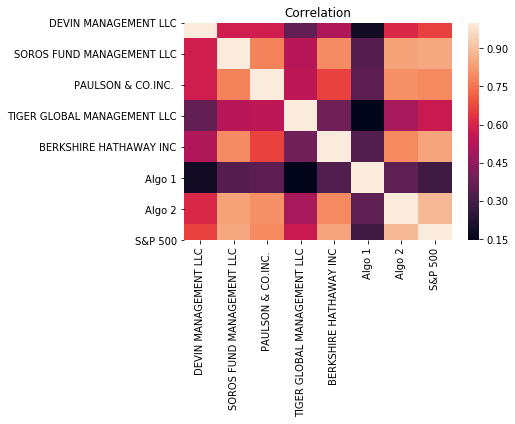

In [74]:
sns.heatmap(all_returns_corr).set_title('Correlation')